In [1]:
import pandas as pd

data = pd.DataFrame({
    'Math' : [70, 60, 40, 80, 30],
    'Chemistry' : [60, 80, 65, 55, 60],
    'Maths' : [70, 60, 40, 80, 30],
    'Physics' : [50, 50, 50, 50, 50],
    'General_test' : [70, 70, 60, 60, 80]
})

print(data)

   Math  Chemistry  Maths  Physics  General_test
0    70         60     70       50            70
1    60         80     60       50            70
2    40         65     40       50            60
3    80         55     80       50            60
4    30         60     30       50            80


## Variance Threshold

In [2]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0)
selected_features = selector.fit_transform(data)
selected_features

array([[70, 60, 70, 70],
       [60, 80, 60, 70],
       [40, 65, 40, 60],
       [80, 55, 80, 60],
       [30, 60, 30, 80]])

In [3]:
data = pd.DataFrame(selected_features, columns=['Math', 'Chemistry', 'Maths', 'General_test'])
data

,Math,Chemistry,Maths,General_test
0,70,60,70,70
1,60,80,60,70
2,40,65,40,60
3,80,55,80,60
4,30,60,30,80


## Correlation

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
cor = data.corr()
cor

,Math,Chemistry,Maths,General_test
Math,1.000000,-0.150424,1.000000,-0.489932
Chemistry,-0.150424,1.000000,-0.150424,0.124274
Maths,1.000000,-0.150424,1.000000,-0.489932
General_test,-0.489932,0.124274,-0.489932,1.000000


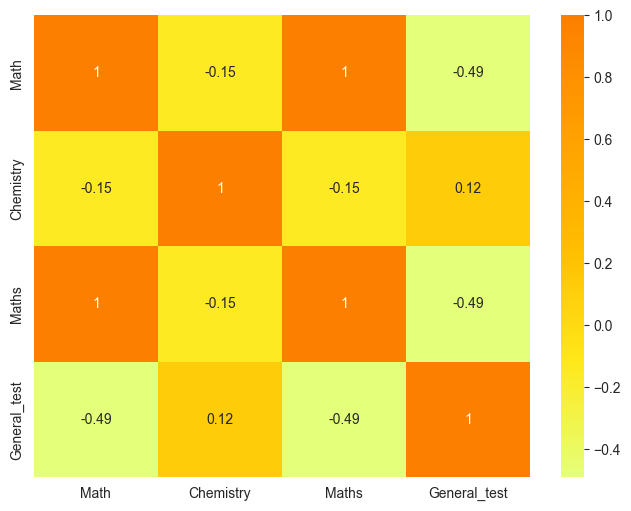

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(cor, annot=True, cmap='Wistia')
plt.show()

In [9]:
corr_features = set()

for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.9:
            col_name = cor.columns[i]
            corr_features.add(col_name)

In [10]:
corr_features

{'Maths'}

In [12]:
data = data.drop(columns=corr_features, axis=1)
data

,Math,Chemistry,General_test
0,70,60,70
1,60,80,70
2,40,65,60
3,80,55,60
4,30,60,80
